# Decision Tree Regression

### What is the Decision Tree Regression?

One of the most widely used practical approaches for supervised learning is the Decision Tree. It can be used to solve both the Regression and Classification tasks with more practical application.


### Example
We will predict salary based on the current role someone is in. The independent variable is postion level, and the dependent variable is salary.


### Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
dataset = pd.read_csv('C:/Users/kzsx/Desktop/ML/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
regressor = DecisionTreeRegressor(random_state = 0)

In [4]:
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

Text(0, 0.5, 'Salary')

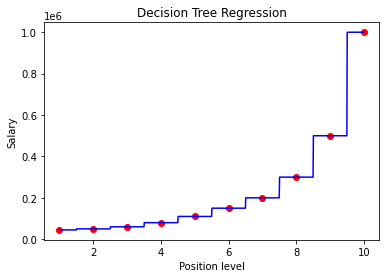

In [5]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

In [6]:
y_pred = regressor.predict([[6.5]])
print("Predicted Salary: $"+str(y_pred[0]))

Predicted Salary: $150000.0


In [7]:
dataset = pd.read_csv('C:/Users/kzsx/Desktop/ML/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
dataset = dataset.drop(columns = ['Administration', 'State'])
dataset.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [9]:
X = dataset.iloc[:, :-1].values

In [10]:
y = dataset.iloc[:, -1].values

In [11]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

In [12]:
budgets = [[300000, 200000], [200000,300000], [100000,400000]]

for budget in budgets:
    y_pred = regressor.predict([budget])
    print("BUDGET:", budget,
          "\nPredicted Profit:", y_pred)

BUDGET: [300000, 200000] 
Predicted Profit: [166187.94]
BUDGET: [200000, 300000] 
Predicted Profit: [166187.94]
BUDGET: [100000, 400000] 
Predicted Profit: [125370.37]


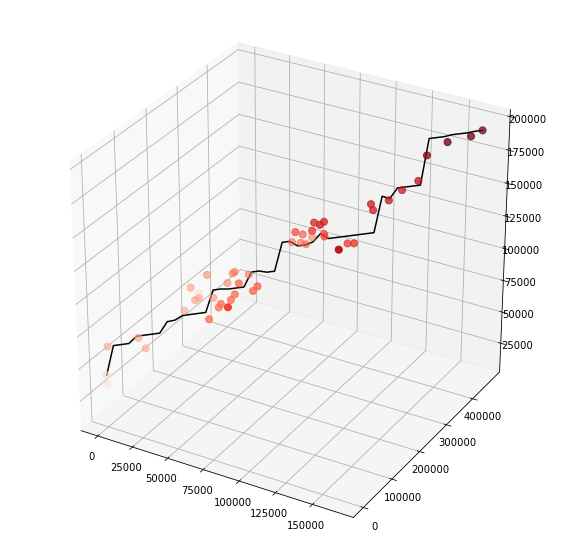

In [14]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
zdata = y
xdata = X[:, 0]
ydata = X[:, 1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds', s = 50);
xline = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
yline = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
z = np.concatenate((xline.reshape(-1,1),yline.reshape(-1,1)), axis = 1)
zline = regressor.predict(z)
ax.plot3D(xline, yline, zline, 'black')